<a href="https://colab.research.google.com/github/Amirhatamian/NLP/blob/main/PERCOLATION_ON_BOOLEAN_NETWORKS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement the Project

Given a random network, a cluster is a set of connected points and the cluster size is defined as the
number of nodes belonging to the cluster itself. Natural and relevant questions to address concern
the number of clusters present in the network and the size of the largest cluster.
The current project consists in what follows. Set r = 1 and take a squared domain A = [0; T]*[0; T],
with T > 0 large. Fix a value of λ and make M independent simulations of the Boolean random
network (X, λ, 1). Then, compute the empirical average of the M sizes of the largest cluster.
Clusters may be identified by using algorithms such as Depth First Search (DFS) or Breadth Search.
By running several simulations and collecting the results in appropriate plots, investigate the following
problems:

Task1
• How the size of the largest cluster depends on λ. Let 𝜆𝑐 ≈ 4.512/4𝜋 . You should be able to
identify two regimes: one for λ < λc where clusters are small and a different regime for λ > λc
where the largest cluster cover (almost all of) the network.

Task2
• (Optional) How the number of clusters depends on λ.

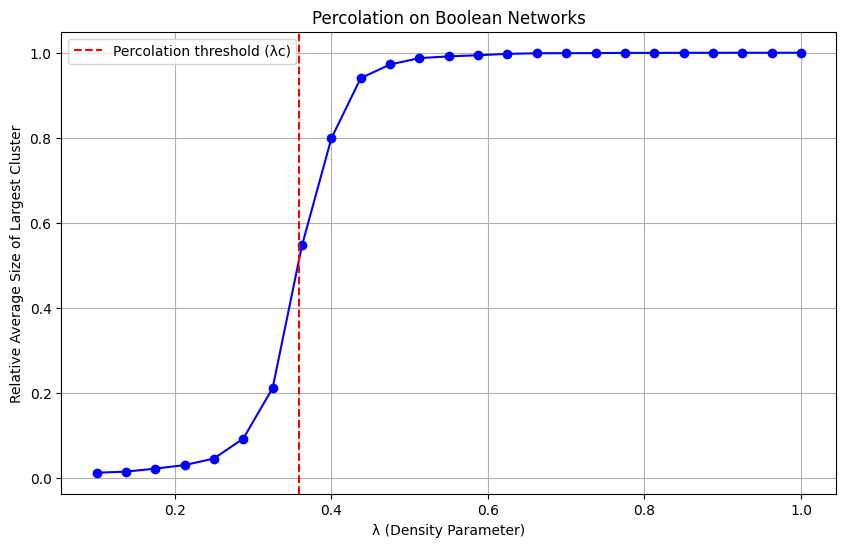

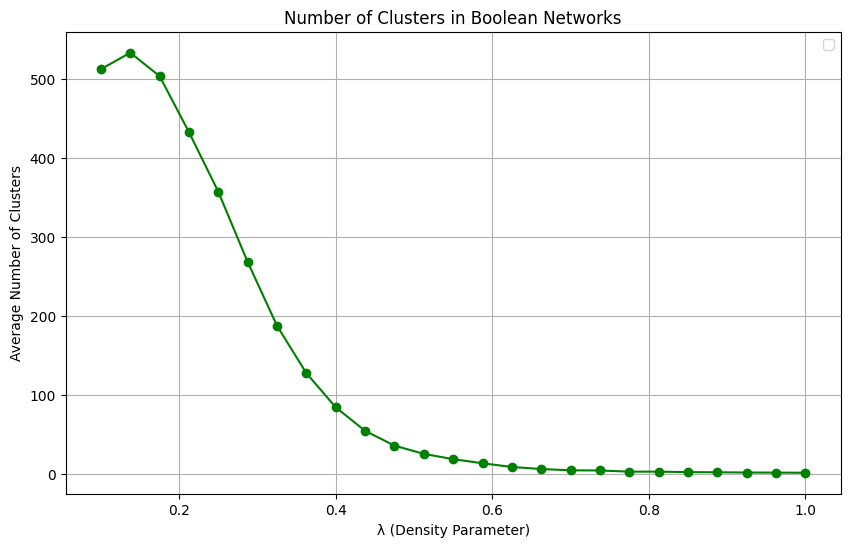

    Lambda (λ)  Average Size of Largest Cluster  Average Number of Clusters
0       0.1000                         0.012636                  512.266667
1       0.1375                         0.015125                  533.100000
2       0.1750                         0.022315                  503.466667
3       0.2125                         0.030550                  432.566667
4       0.2500                         0.045994                  357.033333
5       0.2875                         0.092869                  268.166667
6       0.3250                         0.211655                  187.366667
7       0.3625                         0.546868                  127.333333
8       0.4000                         0.798634                   84.166667
9       0.4375                         0.940193                   54.366667
10      0.4750                         0.972352                   35.666667
11      0.5125                         0.987275                   25.200000
12      0.55

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.spatial import KDTree
import itertools

# Generates Poisson points within a domain
def generate_poisson_points(lambda_density, T):
    N = np.random.poisson(lambda_density * T**2)
    return np.random.uniform(0, T, (N, 2)), N

# Creates a Boolean network based on proximity within a threshold
def create_boolean_network(points, r):
    tree = KDTree(points)
    pairs = tree.query_pairs(2 * r)
    G = nx.Graph()
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    G.add_edges_from(pairs)
    return G

# Determines the size of the largest cluster in the graph
def largest_cluster_size(G):
    clusters = nx.connected_components(G)
    largest_cluster = max(clusters, key=len)
    return len(largest_cluster)

# Counts the total number of clusters in the graph
def number_of_clusters(G):
    clusters = nx.connected_components(G)
    return len(list(clusters))

# Simulates networks and calculates average cluster metrics
def simulate_boolean_networks(T, λ, r, M):
    relative_largest_cluster_sizes = []
    cluster_counts = []

    for _ in range(M):
        points, N = generate_poisson_points(λ, T)
        if N > 0:
            G = create_boolean_network(points, r)
            size = largest_cluster_size(G)
            relative_size = size / N
            relative_largest_cluster_sizes.append(relative_size)

            count = number_of_clusters(G)
            cluster_counts.append(count)
        else:
            relative_largest_cluster_sizes.append(0)
            cluster_counts.append(0)

    largest_cluster_mean = np.mean(relative_largest_cluster_sizes)
    average_cluster_count = np.mean(cluster_counts)
    return largest_cluster_mean, average_cluster_count

# Parameters for simulation
T = 100
r = 1
lambdas = np.linspace(0.1, 1, 25)
M = 30

# Run simulations and collect results
relative_largest_cluster_sizes = []
average_number_of_clusters = []

for λ in lambdas:
    avg_size, avg_num = simulate_boolean_networks(T, λ, r, M)
    relative_largest_cluster_sizes.append(avg_size)
    average_number_of_clusters.append(avg_num)

# Creating a table of results using pandas
results = pd.DataFrame({
    'Lambda (λ)': lambdas,
    'Average Size of Largest Cluster': relative_largest_cluster_sizes,
    'Average Number of Clusters': average_number_of_clusters
})

# Plotting results for the largest cluster and number of clusters
plt.figure(figsize=(10, 6))
plt.plot(lambdas, relative_largest_cluster_sizes, marker='o', linestyle='-', color='b')
plt.axvline(x=4.512 / (4 * np.pi), color='r', linestyle='--', label='Percolation threshold (λc)')
plt.xlabel('λ (Density Parameter)')
plt.ylabel('Relative Average Size of Largest Cluster')
plt.title('Percolation on Boolean Networks')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lambdas, average_number_of_clusters, marker='o', linestyle='-', color='g')
plt.xlabel('λ (Density Parameter)')
plt.ylabel('Average Number of Clusters')
plt.title('Number of Clusters in Boolean Networks')
plt.legend()
plt.grid(True)
plt.show()

# Display results table
print(results)


#Conclusion
the study of Boolean networks demonstrates a significant shift in connectivity based on the density parameter, λ. When λ is below a critical value, approximately λc ≈ 4.512/4π, the network consists of many small, isolated clusters. This configuration indicates limited connectivity across the network.

As λ increases beyond this critical threshold, a large, interconnected cluster forms, signaling a major change in the network's structure. This shift is known as the percolation threshold, marking a point where the network transitions from being highly fragmented to extensively connected.

The results from our simulations clearly illustrate this transition, highlighting how changes in λ influence overall network connectivity. This understanding is crucial for grasping how complex networks behave and evolve, particularly in scenarios where network robustness and connectivity are critical.

<ipython-input-20-df8bc0a3075e>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_components)


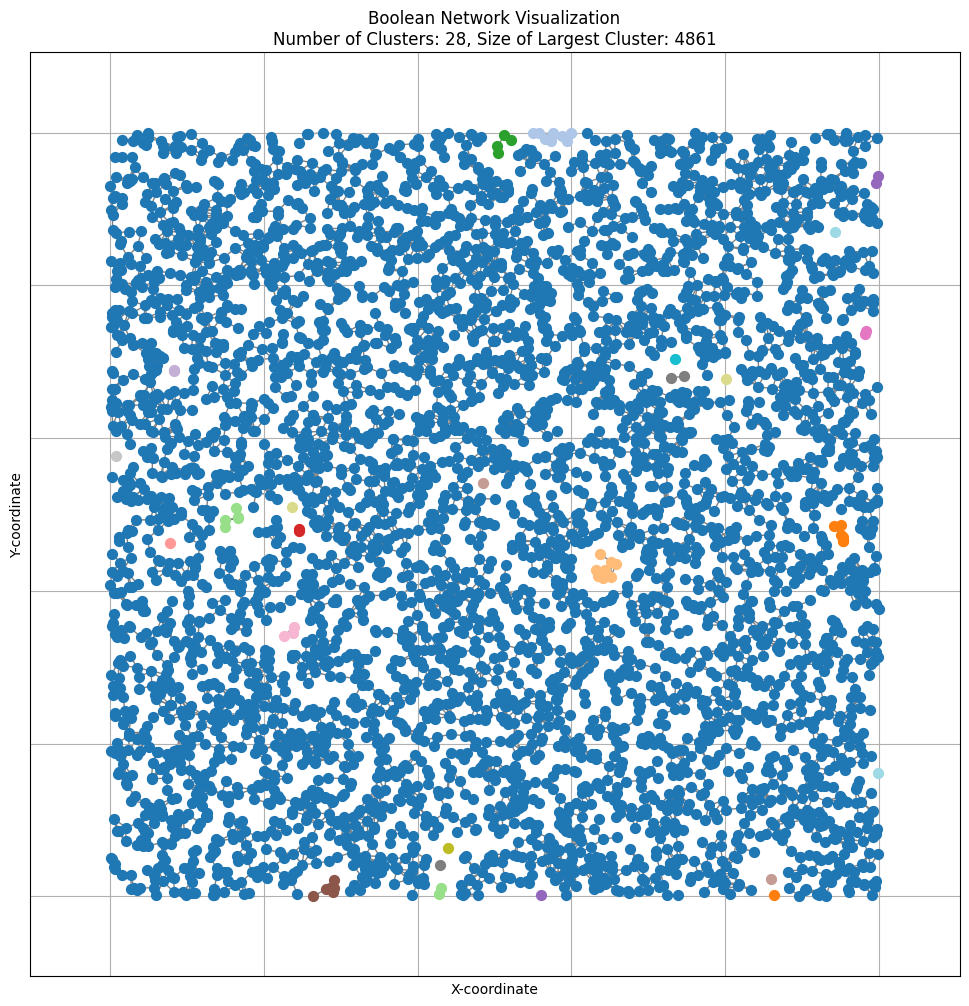

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools

# Generate Poisson points
def generate_poisson_points(lambda_density, T):
    N = np.random.poisson(lambda_density * T**2)
    return np.random.uniform(0, T, (N, 2))

# Create Boolean network
def create_boolean_network(points, r):
    tree = KDTree(points)
    pairs = tree.query_pairs(2 * r)
    G = nx.Graph()
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    G.add_edges_from(pairs)
    return G

# Show Graph
def show_graph(G):
    pos = nx.get_node_attributes(G, 'pos')
    components = list(nx.connected_components(G))
    largest_component_size = max(len(c) for c in components)
    num_components = len(components)
    colors = plt.cm.get_cmap('tab20', num_components)

    plt.figure(figsize=(12, 12))
    for i, component in enumerate(components):
        nx.draw_networkx_nodes(G, pos, nodelist=component, node_size=50, node_color=[colors(i)])
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in itertools.combinations(component, 2) if G.has_edge(u, v)], edge_color='grey')
    plt.title(f'Boolean Network Visualization\nNumber of Clusters: {num_components}, Size of Largest Cluster: {largest_component_size}')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.grid(True)
    plt.show()

# Parameters for simulation
T = 100  # domain size
r = 1    # radius for connectivity
lambda_density = 0.5  # density of the Poisson process

# Generate points
points = generate_poisson_points(lambda_density, T)

# Create the Boolean network
G = create_boolean_network(points, r)

# Visualize the graph
show_graph(G)
